#**O que aprendemos nessa aula:**

Quais caminhos não seguir na hora de trabalhar com Datatime;

Como usar Map, aplicando uma função no DataFrame;

Como usar o Melt no processamento dos dados.


##**Importando as bibliotecas**

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns




##**Importando os dados**

In [40]:
dados = pd.read_csv('https://raw.githubusercontent.com/vqrca/bootcamp_alura_aulas/main/Modulo_2/gastos_totais_ano_mes_atendimento.csv', encoding='ISO-8859-1', 
                    skiprows = 3, sep=';', skipfooter=12, thousands='.', decimal=',')
dados.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2306119.95,2921522.16,3300012.98,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36792954.02,36984314.60,35579251.49,35247659.30,37046350.76,34683341.17,34908420.50,29184688.30,43327731.71,40994545.21,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29


In [41]:
pd.options.display.float_format = "{:.2f}".format #tirando notação científica

In [42]:
#Checando quais são as colunas usáveis:
dados.mean().index

Index(['2007/Ago', '2007/Set', '2007/Out', '2007/Nov', '2007/Dez', '2008/Jan',
       '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai',
       ...
       '2020/Jul', '2020/Ago', '2020/Set', '2020/Out', '2020/Nov', '2020/Dez',
       '2021/Jan', '2021/Fev', '2021/Mar', 'Total'],
      dtype='object', length=165)

In [43]:
#Guardando as colunas usáveis numa variável:
colunas_usaveis = dados.mean().index
colunas_usaveis 


Index(['2007/Ago', '2007/Set', '2007/Out', '2007/Nov', '2007/Dez', '2008/Jan',
       '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai',
       ...
       '2020/Jul', '2020/Ago', '2020/Set', '2020/Out', '2020/Nov', '2020/Dez',
       '2021/Jan', '2021/Fev', '2021/Mar', 'Total'],
      dtype='object', length=165)

In [44]:
dados[colunas_usaveis]

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
1,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
2,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
3,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,28461

In [45]:
#recuperando o nome das Unidades da Federação:
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação") #inserir na posição 0
colunas_usaveis

['Unidade da Federação',
 '2007/Ago',
 '2007/Set',
 '2007/Out',
 '2007/Nov',
 '2007/Dez',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',


In [46]:
usaveis = dados[colunas_usaveis]
usaveis.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,...,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,24999

In [47]:
#Definindo o index:
usaveis = usaveis.set_index('Unidade da Federação')
usaveis

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2740952.07,2478349.44,

In [48]:
#Ordenando as colunas de Unidade da Federação pelo valor 'Total' e excluindo a coluna 'Total' em seguida:
ordenado_por_total = usaveis.sort_values('Total', ascending=False)
ordenado_por_total = ordenado_por_total.drop('Total', axis=1)
ordenado_por_total.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1038067423.15,172961999.58,170556696.16,170338163.23,172462057.87,175492995.85,179569910.06,180005050.15,180151656.17,191859884.40,190927266.19,177093923.51,192412059.08,178641284.75,217011730.99,215128107.89,212905217.48,212715455.71,214079357.56,215265625.54,214249871.52,216117145.69,209183971.87,192157037.74,213512793.72,195787926.41,239411372.83,221202929.85,231922777.54,224043808.74,224157730.03,248761855.09,224121038.86,239354185.52,225639053.93,...,259637865.62,279651701.80,254219071.83,285347367.95,286371908.91,291679087.16,279102175.09,286151216.15,295669082.46,277685593.12,302766551.12,278268419.72,266770321.19,291893655.29,268083525.99,287154994.64,292870544.04,309140915.40,281621767.01,307195118.45,303584114.00,294084067.68,303866355.88,282791833.07,273357491.41,303865927.27,272050698.90,277938674.53,255178741.12,314276263.03,328293581.02,361986896.25,350268671.25,338872478.49,328055822.63,324599773.40,326846228.95,324115425.70,268193064.06,177408317.71
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206208080.90,70301089.50,79119005.51,79046322.41,79268070.12,79619189.20,82209206.98,80374117.08,82409129.30,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100258616.86,91831325.37,97289703.07,95723396.53,100050008.70,98977184.26,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100835953.45,105494550.31,99666115.96,103365357.52,107844259.69,104341138.19,100525403.88,101943625.50,...,138366640.55,146510600.58,130734031.29,151506781.86,150702572.27,153604880.55,150262499.13,156721912.31,160484918.69,145998611.06,157294586.62,148172783.99,145422406.28,153236422.57,142690772.52,151976196.81,157957866.20,163641094.76,154174153.49,166775913.85,161774658.77,157437833.94,166165125.18,152171503.07,152473281.15,158265777.55,141463360.42,147654942.70,127447290.37,142746287.34,157276616.50,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,...,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127083090.02,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127464502.39,132608039.80,124865873.14,134708659.18,127174381.95,126203976.57,133870601.68,126221140.81,113573832.72,122330101.96,116125740.39,114776571.27,97784060.57,111012770.38,115203716.64,123856640.55,125089468.62,121771167.11,127506086.52,133443307.36,122146256.92,106948897.53,83130175.37,43480729.07
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.0

In [49]:

colunas_interessadas = ordenado_por_total.columns[6:]
ordenado_por_total = ordenado_por_total[colunas_interessadas]
ordenado_por_total

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,172961999.58,170556696.16,170338163.23,172462057.87,175492995.85,179569910.06,180005050.15,180151656.17,191859884.40,190927266.19,177093923.51,192412059.08,178641284.75,217011730.99,215128107.89,212905217.48,212715455.71,214079357.56,215265625.54,214249871.52,216117145.69,209183971.87,192157037.74,213512793.72,195787926.41,239411372.83,221202929.85,231922777.54,224043808.74,224157730.03,248761855.09,224121038.86,239354185.52,225639053.93,210710879.63,229146880.12,221660000.41,241445575.82,229920625.55,250817406.39,...,259637865.62,279651701.80,254219071.83,285347367.95,286371908.91,291679087.16,279102175.09,286151216.15,295669082.46,277685593.12,302766551.12,278268419.72,266770321.19,291893655.29,268083525.99,287154994.64,292870544.04,309140915.40,281621767.01,307195118.45,303584114.00,294084067.68,303866355.88,282791833.07,273357491.41,303865927.27,272050698.90,277938674.53,255178741.12,314276263.03,328293581.02,361986896.25,350268671.25,338872478.49,328055822.63,324599773.40,326846228.95,324115425.70,268193064.06,177408317.71
31 Minas Gerais,70301089.50,79119005.51,79046322.41,79268070.12,79619189.20,82209206.98,80374117.08,82409129.30,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100258616.86,91831325.37,97289703.07,95723396.53,100050008.70,98977184.26,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100835953.45,105494550.31,99666115.96,103365357.52,107844259.69,104341138.19,100525403.88,101943625.50,99538953.60,107766131.57,103149387.49,111077091.84,106094329.28,115487199.35,...,138366640.55,146510600.58,130734031.29,151506781.86,150702572.27,153604880.55,150262499.13,156721912.31,160484918.69,145998611.06,157294586.62,148172783.99,145422406.28,153236422.57,142690772.52,151976196.81,157957866.20,163641094.76,154174153.49,166775913.85,161774658.77,157437833.94,166165125.18,152171503.07,152473281.15,158265777.55,141463360.42,147654942.70,127447290.37,142746287.34,157276616.50,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00
41 Paraná,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,70517638.39,74712784.07,71314740.25,76914668.09,74232937.37,81709021.05,...,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127083090.02,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127464502.39,132608039.80,124865873.14,134708659.18,127174381.95,126203976.57,133870601.68,126221140.81,113573832.72,122330101.96,116125740.39,114776571.27,97784060.57,111012770.38,115203716.64,123856640.55,125089468.62,121771167.11,127506086.52,133443307.36,122146256.92,106948897.53,83130175.37,43480729.07
43 Rio Grande do Sul,45897704.82,52928695.92,51972416.77,51679350.79,53

Retirando os números que antecedem os nomes das Unidades da Federação:

In [50]:
ordenado_por_total.index = ordenado_por_total.index.str[3:]

In [51]:
ordenado_por_total.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
São Paulo,172961999.58,170556696.16,170338163.23,172462057.87,175492995.85,179569910.06,180005050.15,180151656.17,191859884.40,190927266.19,177093923.51,192412059.08,178641284.75,217011730.99,215128107.89,212905217.48,212715455.71,214079357.56,215265625.54,214249871.52,216117145.69,209183971.87,192157037.74,213512793.72,195787926.41,239411372.83,221202929.85,231922777.54,224043808.74,224157730.03,248761855.09,224121038.86,239354185.52,225639053.93,210710879.63,229146880.12,221660000.41,241445575.82,229920625.55,250817406.39,...,259637865.62,279651701.80,254219071.83,285347367.95,286371908.91,291679087.16,279102175.09,286151216.15,295669082.46,277685593.12,302766551.12,278268419.72,266770321.19,291893655.29,268083525.99,287154994.64,292870544.04,309140915.40,281621767.01,307195118.45,303584114.00,294084067.68,303866355.88,282791833.07,273357491.41,303865927.27,272050698.90,277938674.53,255178741.12,314276263.03,328293581.02,361986896.25,350268671.25,338872478.49,328055822.63,324599773.40,326846228.95,324115425.70,268193064.06,177408317.71
Minas Gerais,70301089.50,79119005.51,79046322.41,79268070.12,79619189.20,82209206.98,80374117.08,82409129.30,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100258616.86,91831325.37,97289703.07,95723396.53,100050008.70,98977184.26,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100835953.45,105494550.31,99666115.96,103365357.52,107844259.69,104341138.19,100525403.88,101943625.50,99538953.60,107766131.57,103149387.49,111077091.84,106094329.28,115487199.35,...,138366640.55,146510600.58,130734031.29,151506781.86,150702572.27,153604880.55,150262499.13,156721912.31,160484918.69,145998611.06,157294586.62,148172783.99,145422406.28,153236422.57,142690772.52,151976196.81,157957866.20,163641094.76,154174153.49,166775913.85,161774658.77,157437833.94,166165125.18,152171503.07,152473281.15,158265777.55,141463360.42,147654942.70,127447290.37,142746287.34,157276616.50,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00
Paraná,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,70517638.39,74712784.07,71314740.25,76914668.09,74232937.37,81709021.05,...,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127083090.02,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127464502.39,132608039.80,124865873.14,134708659.18,127174381.95,126203976.57,133870601.68,126221140.81,113573832.72,122330101.96,116125740.39,114776571.27,97784060.57,111012770.38,115203716.64,123856640.55,125089468.62,121771167.11,127506086.52,133443307.36,122146256.92,106948897.53,83130175.37,43480729.07
Rio Grande do Sul,45897704.82,52928695.92,51972416.77,51679350.79,53759674.01,56

Guardando o dataframe transposto na variável mensal:

In [53]:
mensal = ordenado_por_total.T
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008/Fev,172961999.58,70301089.50,48855046.46,45897704.82,44128159.73,33410124.06,26222079.10,24409572.92,27643304.86,18149374.27,20126081.01,13452263.93,10032886.43,9110108.87,10871589.62,10215956.80,8279288.79,9711680.20,8112220.30,7929894.93,7934652.10,4636850.76,5051932.07,1940792.63,1743978.66,771687.83,1275063.72
2008/Mar,170556696.16,79119005.51,55611791.07,52928695.92,42900847.02,41316672.72,30716361.81,27483480.50,30085370.22,20992213.03,22149375.82,14750895.33,12262049.08,10126626.54,12348758.14,11627918.26,9793888.78,10428191.09,9210505.56,9416367.68,8641517.13,5017838.07,5200151.87,1955721.68,2057439.02,876091.18,1177745.93
2008/Abr,170338163.23,79046322.41,56115135.82,51972416.77,45306499.53,42826993.62,30589332.79,27806641.44,31376221.00,21049477.30,23436682.75,15148647.11,12453466.98,10964234.85,12680965.13,11922015.36,8997542.75,10227943.00,10466691.94,9390588.03,8531576.49,5265951.03,5343714.73,2143353.81,2057829.69,896952.53,1396371.51
2008/Mai,172462057.87,79268070.12,55574831.93,51679350.79,43951349.46,42086263.49,31420089.90,28354279.52,31189904.62,19162546.79,23861080.80,14543679.92,11789786.09,11032871.23,13258411.71,11900817.00,9842108.59,10562148.66,9844096.03,9378197.25,9079902.15,5367094.94,5344487.99,2280382.58,2226577.93,1027288.73,1411520.77
2008/Jun,175492995.85,79619189.20,56094754.74,53759674.01,44111107.27,39910042.40,28947510.92,28993292.76,29463965.11,20362996.88,23502915.90,14553978.06,11889687.35,10450599.08,12246686.33,11969271.76,10257782.00,10465088.93,10299459.18,9450300.60,8646295.77,4981036.36,5398413.09,2624542.97,2112576.82,938293.54,1420892.01


Trabalhando com formtação de dia:

In [56]:
from datetime import date

meses = { 
    'Jan' : 1,
    'Fev' : 2,
    'Mar' : 3,
    'Abr' : 4,
    'Mai' : 5,
    'Jun' : 6,
    'Jul' : 7,
    'Ago' : 8,
    'Set' : 9,
    'Out' : 10,
    'Nov' : 11,
    'Dez' : 12,
} #dicionário com os meses e seus números correspondentes, para fazer a substituição

def para_dia(ano_mes):
    ano: int = int(ano_mes[:4]) 
    mes: str = ano_mes[5:]
    mes_numero: int = meses[mes] #usando o dicionário para definir os meses
    return date(ano, mes_numero, 1) 



In [57]:
mensal.index = mensal.index.map(para_dia)
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-02-01,172961999.58,70301089.50,48855046.46,45897704.82,44128159.73,33410124.06,26222079.10,24409572.92,27643304.86,18149374.27,20126081.01,13452263.93,10032886.43,9110108.87,10871589.62,10215956.80,8279288.79,9711680.20,8112220.30,7929894.93,7934652.10,4636850.76,5051932.07,1940792.63,1743978.66,771687.83,1275063.72
2008-03-01,170556696.16,79119005.51,55611791.07,52928695.92,42900847.02,41316672.72,30716361.81,27483480.50,30085370.22,20992213.03,22149375.82,14750895.33,12262049.08,10126626.54,12348758.14,11627918.26,9793888.78,10428191.09,9210505.56,9416367.68,8641517.13,5017838.07,5200151.87,1955721.68,2057439.02,876091.18,1177745.93
2008-04-01,170338163.23,79046322.41,56115135.82,51972416.77,45306499.53,42826993.62,30589332.79,27806641.44,31376221.00,21049477.30,23436682.75,15148647.11,12453466.98,10964234.85,12680965.13,11922015.36,8997542.75,10227943.00,10466691.94,9390588.03,8531576.49,5265951.03,5343714.73,2143353.81,2057829.69,896952.53,1396371.51
2008-05-01,172462057.87,79268070.12,55574831.93,51679350.79,43951349.46,42086263.49,31420089.90,28354279.52,31189904.62,19162546.79,23861080.80,14543679.92,11789786.09,11032871.23,13258411.71,11900817.00,9842108.59,10562148.66,9844096.03,9378197.25,9079902.15,5367094.94,5344487.99,2280382.58,2226577.93,1027288.73,1411520.77
2008-06-01,175492995.85,79619189.20,56094754.74,53759674.01,44111107.27,39910042.40,28947510.92,28993292.76,29463965.11,20362996.88,23502915.90,14553978.06,11889687.35,10450599.08,12246686.33,11969271.76,10257782.00,10465088.93,10299459.18,9450300.60,8646295.77,4981036.36,5398413.09,2624542.97,2112576.82,938293.54,1420892.01


In [66]:
mensal.index

Index([2008-02-01, 2008-03-01, 2008-04-01, 2008-05-01, 2008-06-01, 2008-07-01,
       2008-08-01, 2008-09-01, 2008-10-01, 2008-11-01,
       ...
       2020-06-01, 2020-07-01, 2020-08-01, 2020-09-01, 2020-10-01, 2020-11-01,
       2020-12-01, 2021-01-01, 2021-02-01, 2021-03-01],
      dtype='object', length=158)

Agora temos todas as datas alteradas! vamos plotar um novo gráfico para ver como isso vai melhorar a visualização:

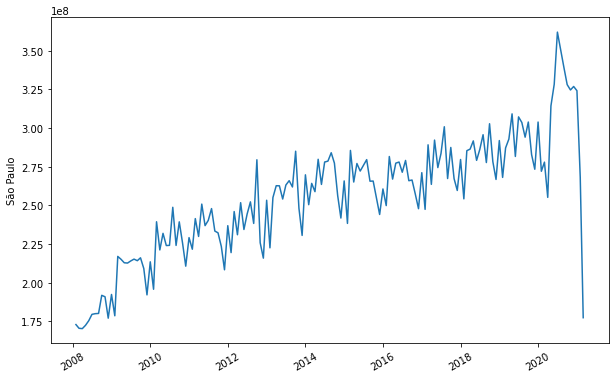

In [80]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=mensal, x=mensal.index, y='São Paulo')
plt.xticks(rotation=30)
plt.show()

Agora automaticamente foram colocados os anos 2008, 2010, 2012, 2014, 2016, 2018 e 2020, melhorando a visualização e deixando a legenda mais limpa.
Adicionando mais um estado ao gráfico:

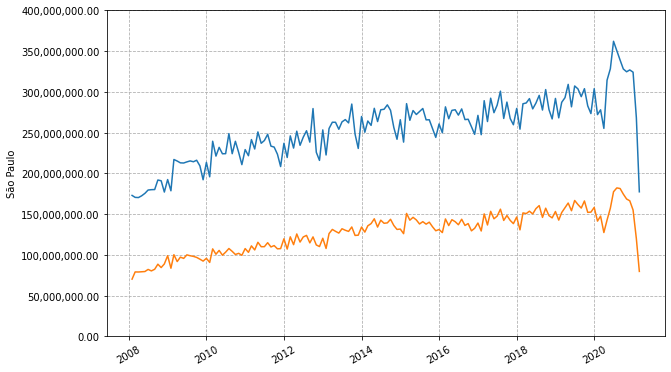

In [87]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal, x=mensal.index, y='São Paulo')
ax = sns.lineplot(data=mensal, x=mensal.index, y='Minas Gerais')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.xticks(rotation=30)
plt.grid(linestyle="--")
plt.ylim(0, 400000000)
plt.show()

Nós chamamos o lineplot duas vezes: São Paulo e Minas Gerais. Você só não sabe qual é qual, esse é o primeiro problema. Se você não customizar o nome do eixo, você também não sabe.
O problema é o seguinte: o seaborn recebe um `x` e um `y`. O `x` é o índice e o `y` são os estados, não tem problema. Mas o problema é: eu só posso ter um único `x`.

Outra forma eu poderia representar essa tabela com todos esses dados:

Primeiro, vamos tirar esse índice, `mensal.reset_index()`:


In [88]:
mensal.reset_index()

Unidade da Federação,index,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
0,2008-02-01,172961999.58,70301089.50,48855046.46,45897704.82,44128159.73,33410124.06,26222079.10,24409572.92,27643304.86,18149374.27,20126081.01,13452263.93,10032886.43,9110108.87,10871589.62,10215956.80,8279288.79,9711680.20,8112220.30,7929894.93,7934652.10,4636850.76,5051932.07,1940792.63,1743978.66,771687.83,1275063.72
1,2008-03-01,170556696.16,79119005.51,55611791.07,52928695.92,42900847.02,41316672.72,30716361.81,27483480.50,30085370.22,20992213.03,22149375.82,14750895.33,12262049.08,10126626.54,12348758.14,11627918.26,9793888.78,10428191.09,9210505.56,9416367.68,8641517.13,5017838.07,5200151.87,1955721.68,2057439.02,876091.18,1177745.93
2,2008-04-01,170338163.23,79046322.41,56115135.82,51972416.77,45306499.53,42826993.62,30589332.79,27806641.44,31376221.00,21049477.30,23436682.75,15148647.11,12453466.98,10964234.85,12680965.13,11922015.36,8997542.75,10227943.00,10466691.94,9390588.03,8531576.49,5265951.03,5343714.73,2143353.81,2057829.69,896952.53,1396371.51
3,2008-05-01,172462057.87,79268070.12,55574831.93,51679350.79,43951349.46,42086263.49,31420089.90,28354279.52,31189904.62,19162546.79,23861080.80,14543679.92,11789786.09,11032871.23,13258411.71,11900817.00,9842108.59,10562148.66,9844096.03,9378197.25,9079902.15,5367094.94,5344487.99,2280382.58,2226577.93,1027288.73,1411520.77
4,2008-06-01,175492995.85,79619189.20,56094754.74,53759674.01,44111107.27,39910042.40,28947510.92,28993292.76,29463965.11,20362996.88,23502915.90,14553978.06,11889687.35,10450599.08,12246686.33,11969271.76,10257782.00,10465088.93,10299459.18,9450300.60,8646295.77,4981036.36,5398413.09,2624542.97,2112576.82,938293.54,1420892.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,2020-11-01,324599773.40,168564708.16,133443307.36,116738266.69,82807309.85,81866088.87,71810830.78,79448753.69,54026288.42,39785408.90,37043032.10,32446802.41,35708727.33,24312931.74,17799651.06,20668526.36,21418665.16,20021998.76,18857578.34,18316623.02,20451573.77,11816872.93,509009.74,8759013.71,3393958.27,3527263.23,2714710.93
154,2020-12-01,326846228.95,166376967.67,122146256.92,116833971.73,90567351.87,83131785.74,77877186.72,72720675.11,50271552.33,37614253.55,36914437.92,30927070.93,40500910.57,27277816.41,20355212.85,22552034.04,21387005.58,19352220.14,17462663.52,18852854.81,21546059.48,10997949.03,689383.43,9003402.23,3711660.71,3125021.90,2826612.42
155,2021-01-01,324115425.70,155064483.25,106948897.53,102317646.36,87201907.99,70325599.07,76810042.34,57281832.19,43743425.74,35655886.73,33887773.65,26797697.76,33767261.13,23228004.80,20149018.68,22573869.50,16027788.65,18437275.64,16496784.27,15890528.31,24439059.57,7149727.62,347626.85,8414690.60,3005561.16,3209323.68,2513766.36
156,2021-02-01,268193064.06,119877417.15,83130175.37,84404640.00,60873103.08,55544579.04,62259409.32,47429335.91,30186951.00,32253788.65,23343222.94,23260245.95,25669612.63,18186942.80,16996494.03,19004029.87,11428462.42,13636005.36,12792571.64,13207979.82,13679358.06,4129845.36,416534.32,6039419.59,2272733.90,3044798.77,1534733.18


Agora o que eu vamos fazer é o seguinte: alterar nossa tabela para pegar essas várias variáveis, que são São Paulo, Minas Gerais, Paraná, Rio Grande do Sul etc., e transformá-las em linhas extras. Se antes eu tinha uma única linha, agora eu vou ter 27 linhas para cada um desses.

O que eu tenho que falar é que eu quero derreter a minha tela, eu quero pegá-la e quebrá-la para baixo. Isso é feito com `melt()` e quando você faz um melt, você tem que falar qual é a coluna que você não quer derreter, que você quer manter do jeito que está. Vamos pensar? A coluna VALOR nem existe, a coluna ESTADO' também não existe, só existe a coluna MES, que se chama index, então `id_vars` é quem identifica, as colunas que identificam unicamente alguma coisa é só `index`:

In [90]:
mensal.reset_index().melt(id_vars=['index'])

,index,Unidade da Federação,value
0,2008-02-01,São Paulo,172961999.58
1,2008-03-01,São Paulo,170556696.16
2,2008-04-01,São Paulo,170338163.23
3,2008-05-01,São Paulo,172462057.87
4,2008-06-01,São Paulo,175492995.85
...,...,...,...
4261,2020-11-01,Amapá,2714710.93
4262,2020-12-01,Amapá,2826612.42
4263,2021-01-01,Amapá,2513766.36
4264,2021-02-01,Amapá,1534733.18


Para garantir a ordem dessas colunas, deixar de forma explícita, vamos falar que as variáveis de valor são todas essas, São Paulo até o último estado, são os estados. Então `mensal.columns`, todos os estados. Assim eu tenho certeza que vem nessa ordem, eu estou forçando uma ordem:

In [91]:
mensal.reset_index().melt(id_vars=["index"], value_vars=mensal.columns) 

,index,Unidade da Federação,value
0,2008-02-01,São Paulo,172961999.58
1,2008-03-01,São Paulo,170556696.16
2,2008-04-01,São Paulo,170338163.23
3,2008-05-01,São Paulo,172462057.87
4,2008-06-01,São Paulo,175492995.85
...,...,...,...
4261,2020-11-01,Amapá,2714710.93
4262,2020-12-01,Amapá,2826612.42
4263,2021-01-01,Amapá,2513766.36
4264,2021-02-01,Amapá,1534733.18


Agora vamos definir o nome das colunas:

In [93]:
mensal_aberto = mensal.reset_index().melt(id_vars=['index'], value_vars=mensal.columns)
mensal_aberto.columns = ['mes', 'uf', 'gasto']
mensal_aberto.head()

,mes,uf,gasto
0,2008-02-01,São Paulo,172961999.58
1,2008-03-01,São Paulo,170556696.16
2,2008-04-01,São Paulo,170338163.23
3,2008-05-01,São Paulo,172462057.87
4,2008-06-01,São Paulo,175492995.85


Visualização gráfica após o melt:

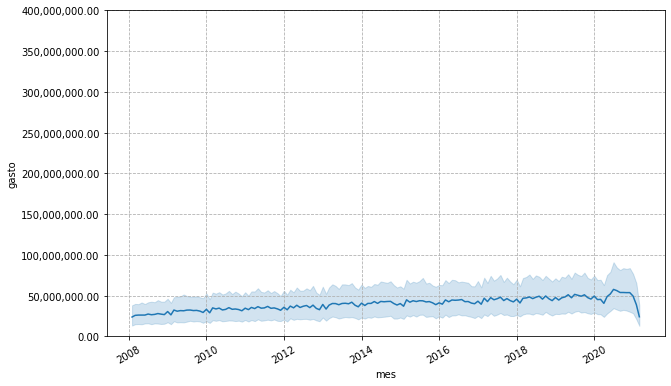

In [97]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto, x="mes", y="gasto")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.ylim(0, 400000000)
plt.xticks(rotation=30)
plt.grid(linestyle="--")
plt.show()

 Nesse gráfico a linha azul representa o que podemos esperar que seja a média dos valores. Isso é, de todos os valores de 2008, esse é o valor médio e assim vai progressivamente. E essa faixa é um intervalo de confiança que eles criam estatisticamente. O plot agrega vários Y, quer dizer, para o mesmo valor de X, mesmo mês. Você tem vários Y, ele agrega. E ele mostra uma estimativa de tendência central, que no nosso caso é a média, e o intervalo de confiança para aquela estimativa.

Para incluir todos os estados no gráfico: Uma forma é definir a tonalidade, o `hue`. O `hue` vai ser a coluna “uf” e temos agora 27 linhas diferentes. Temos todos os estados sendo plotados agora:

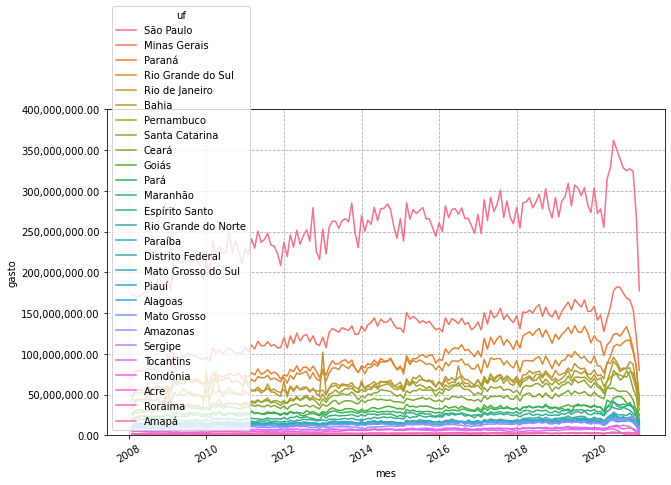

In [100]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto, x="mes", y="gasto", hue="uf")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.xticks(rotation=30)
plt.grid(linestyle="--")
plt.ylim(0, 400000000)
plt.show()

###**Desafio 01: Estudar a documentação DateTime do Python, escolha dois métodos para se aprofundar faça alguns testes e compartilhe o conhecimento adquirido com seus colegas no Discord.**

O módulo `datetime` fornece as classes para manipulação de datas e horas.

Ainda que a aritmética de data e hora seja suportada, o foco da implementação é na extração eficiente do atributo para formatação da saída e manipulação.

**Tipos disponíveis**

- class `datetime.date`
Uma data ingênua idealizada, presumindo que o atual calendário Gregoriano sempre foi, e sempre estará em vigor. *Atributos: year, month, e day.*
- class `datetime.time`
Um horário ideal, independente de qualquer dia em particular, presumindo que todos os dias tenham exatamente 24*60*60 segundos. (Não há noção de “segundos bissextos” aqui.) *Atributos: hour, minute, second, microsecond e tzinfo.*
- class `datetime.datetime`
Uma combinação de uma data e uma hora. *Atributos: year, month, day, hour, minute, second, microsecond, e tzinfo.*
- class `datetime.timedelta`
Uma duração que expressa a diferença entre duas instâncias date, time ou datetime para resolução de microssegundos.
- class `datetime.tzinfo`
Uma classe base abstrata para objetos de informações de fuso horário. Eles são usados pelas classes datetime e time para fornecer uma noção personalizável de ajuste de horário (por exemplo, para considerar o fuso horário e/ou o horário de verão).
- class` datetime.timezone`
Uma classe que implementa a classe base abstrata tzinfo como uma diferença fixa do UTC.


###**Desafio 02: Aprendemos a usar o Melt para desnormalizar sua base de dados, agora o desafio é realizar o processo contrário, voltar atrás partindo do mensal_aberto chegando no mensal.**

In [143]:
mensal_aberto = mensal.reset_index().melt(id_vars='index', var_name='uf', value_name='gasto')
mensal_aberto

,index,uf,gasto
0,2008-02-01,São Paulo,172961999.58
1,2008-03-01,São Paulo,170556696.16
2,2008-04-01,São Paulo,170338163.23
3,2008-05-01,São Paulo,172462057.87
4,2008-06-01,São Paulo,175492995.85
...,...,...,...
4261,2020-11-01,Amapá,2714710.93
4262,2020-12-01,Amapá,2826612.42
4263,2021-01-01,Amapá,2513766.36
4264,2021-02-01,Amapá,1534733.18


In [145]:
mensal_original = mensal_aberto.pivot_table(values='gasto', columns='uf', index='index')
mensal_original


uf,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,Mato Grosso,Mato Grosso do Sul,Minas Gerais,Paraná,Paraíba,Pará,Pernambuco,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
index,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-02-01,1743978.66,8112220.30,1275063.72,7934652.10,33410124.06,27643304.86,10215956.80,10032886.43,18149374.27,13452263.93,7929894.93,8279288.79,70301089.50,48855046.46,10871589.62,20126081.01,26222079.10,9711680.20,9110108.87,45897704.82,44128159.73,1940792.63,771687.83,24409572.92,4636850.76,172961999.58,5051932.07
2008-03-01,2057439.02,9210505.56,1177745.93,8641517.13,41316672.72,30085370.22,11627918.26,12262049.08,20992213.03,14750895.33,9416367.68,9793888.78,79119005.51,55611791.07,12348758.14,22149375.82,30716361.81,10428191.09,10126626.54,52928695.92,42900847.02,1955721.68,876091.18,27483480.50,5017838.07,170556696.16,5200151.87
2008-04-01,2057829.69,10466691.94,1396371.51,8531576.49,42826993.62,31376221.00,11922015.36,12453466.98,21049477.30,15148647.11,9390588.03,8997542.75,79046322.41,56115135.82,12680965.13,23436682.75,30589332.79,10227943.00,10964234.85,51972416.77,45306499.53,2143353.81,896952.53,27806641.44,5265951.03,170338163.23,5343714.73
2008-05-01,2226577.93,9844096.03,1411520.77,9079902.15,42086263.49,31189904.62,11900817.00,11789786.09,19162546.79,14543679.92,9378197.25,9842108.59,79268070.12,55574831.93,13258411.71,23861080.80,31420089.90,10562148.66,11032871.23,51679350.79,43951349.46,2280382.58,1027288.73,28354279.52,5367094.94,172462057.87,5344487.99
2008-06-01,2112576.82,10299459.18,1420892.01,8646295.77,39910042.40,29463965.11,11969271.76,11889687.35,20362996.88,14553978.06,9450300.60,10257782.00,79619189.20,56094754.74,12246686.33,23502915.90,28947510.92,10465088.93,10450599.08,53759674.01,44111107.27,2624542.97,938293.54,28993292.76,4981036.36,175492995.85,5398413.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-01,3393958.27,18857578.34,2714710.93,20451573.77,81866088.87,54026288.42,20668526.36,35708727.33,39785408.90,32446802.41,18316623.02,21418665.16,168564708.16,133443307.36,17799651.06,37043032.10,71810830.78,20021998.76,24312931.74,116738266.69,82807309.85,8759013.71,3527263.23,79448753.69,11816872.93,324599773.40,509009.74
2020-12-01,3711660.71,17462663.52,2826612.42,21546059.48,83131785.74,50271552.33,22552034.04,40500910.57,37614253.55,30927070.93,18852854.81,21387005.58,166376967.67,122146256.92,20355212.85,36914437.92,77877186.72,19352220.14,27277816.41,116833971.73,90567351.87,9003402.23,3125021.90,72720675.11,10997949.03,326846228.95,689383.43
2021-01-01,3005561.16,16496784.27,2513766.36,24439059.57,70325599.07,43743425.74,22573869.50,33767261.13,35655886.73,26797697.76,15890528.31,16027788.65,155064483.25,106948897.53,20149018.68,33887773.65,76810042.34,18437275.64,23228004.80,102317646.36,87201907.99,8414690.60,3209323.68,57281832.19,7149727.62,324115425.70,347626.85


###**Desafio 03: Melhorar o gráfico da distribuição do gráfico:**

**Escolha apenas alguns estados.**

**Mude a palete de cores.** 

**Posicione a legenda de forma mais adequada.**

**Adicione título principal e nos eixos x e y.**


Somente a região Sul:

In [113]:
sul = ['Paraná', 'Rio Grande do Sul', 'Santa Catarina']
mensal_sul = mensal_aberto[mensal_aberto['uf'].isin(sul)]
mensal_sul

,mes,uf,gasto
316,2008-02-01,Paraná,48855046.46
317,2008-03-01,Paraná,55611791.07
318,2008-04-01,Paraná,56115135.82
319,2008-05-01,Paraná,55574831.93
320,2008-06-01,Paraná,56094754.74
...,...,...,...
1259,2020-11-01,Santa Catarina,79448753.69
1260,2020-12-01,Santa Catarina,72720675.11
1261,2021-01-01,Santa Catarina,57281832.19
1262,2021-02-01,Santa Catarina,47429335.91


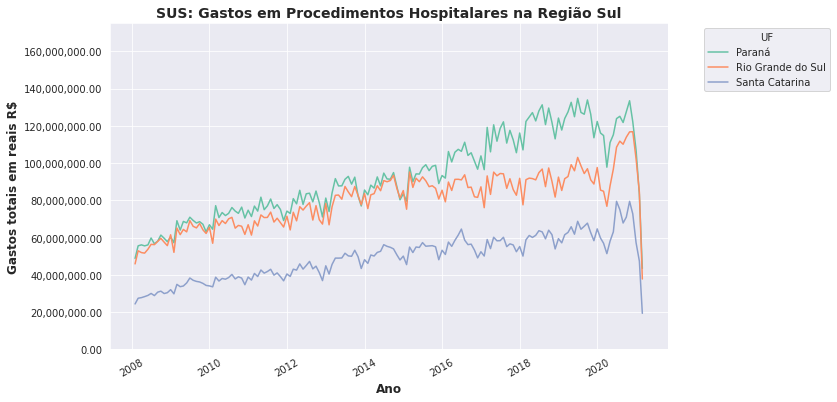

In [140]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.set_palette(list(sns.color_palette('Set2')))
ax = sns.lineplot(data=mensal_sul, x="mes", y="gasto", hue="uf")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.xlabel('Ano', weight='bold', fontsize=12)
plt.ylabel('Gastos totais em reais R$', weight='bold', fontsize=12)
plt.title('SUS: Gastos em Procedimentos Hospitalares na Região Sul', weight='bold', fontsize=14)
plt.legend(title='UF', bbox_to_anchor=(1.3, 1), loc='upper right')
plt.xticks(rotation=30)
plt.ylim(0, 175000000)
plt.show()

Todos os estados:

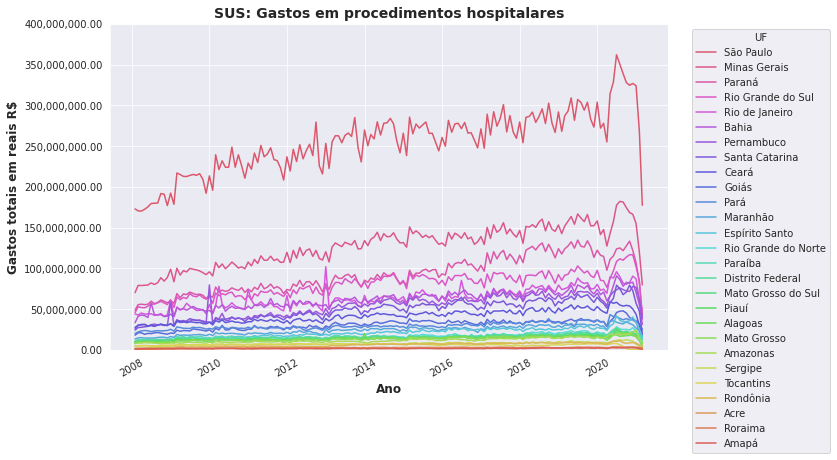

In [141]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.set_palette(list(reversed(sns.color_palette('hls', 27))))
ax = sns.lineplot(data=mensal_aberto, x="mes", y="gasto", hue="uf")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
plt.xlabel('Ano', weight='bold', fontsize=12)
plt.ylabel('Gastos totais em reais R$', weight='bold', fontsize=12)
plt.title('SUS: Gastos em procedimentos hospitalares', weight='bold', fontsize=14)
plt.legend(title='UF', bbox_to_anchor=(1.3, 1), loc='upper right')
plt.xticks(rotation=30)
plt.ylim(0, 400000000)
plt.show()